In [1]:
import numpy as np
import pandas as pd

import re
import seaborn as sb

In [2]:
df1 = pd.read_csv(r"/Users/vamsi/Downloads/laptop_details.csv")

In [3]:
df = pd.read_csv(r"/Users/vamsi/Downloads/laptop_details.csv")

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


# EXTRACTING THE COLUMNS FROM THE EXISTING COLUMNS

In [4]:
brand = [ ]
for i in range(len(df)):
    if 'Core' in df['Product'][i]:
        brand.append(df['Product'][i].split(' Core')[0])
    else:
        brand.append(df['Product'][i].split(' -')[0])
df[['Brand']] = pd.DataFrame(brand)

In [5]:
Processor = [ ]
for i in range(len(df)):
    if  df['Feature'][i].startswith('Intel') or df['Feature'][i].startswith('AMD') or df['Feature'][i].startswith('Apple'):
        Processor.append(df['Feature'][i].split(' Processor')[0])
    else:
        Processor.append(re.findall(r'(Core [i]\d | Ryzen \d | Snapdragon \d\w | Pentium)' ,df.iloc[i]['Product'])[0].strip())
for i in range(720):
    if Processor[i].startswith('Core'):
        Processor[i] = 'Intel '+Processor[i]
    elif Processor[i].startswith('Ry'):
        Processor[i] = 'AMD '+Processor[i]
df[['Processor']] = pd.DataFrame(Processor)

ram = []
for i in range(720):
    ram.append(re.findall(r'\((\d+\s\w+)',df['Product'][i])[0])
df[['RAM']] = pd.DataFrame(ram)

In [6]:
df.head(21)

,Product,Rating,MRP,Feature,Brand,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS VivoBook 15 (2022),Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP Pavilion Ryzen 5 Hexa,AMD Ryzen 5 Hexa Core
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS TUF Gaming F15,Intel Core i5
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,HP 14s Intel,Intel Core i3
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,"₹38,990",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,DELL Inspiron,Intel Core i3
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,RedmiBook Pro,Intel Core i5
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...,realme Book (Slim),Intel Core i3
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,"₹44,990",AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...,ASUS VivoBook 14 (2022) Ryzen 7 Quad,AMD Ryzen 7 Quad Core


In [7]:
feat = []
for i in range(720):
    feat.append(df['Product'][i].split('- (')[1].split(')')[0].split("/"))

In [8]:
for i in feat:
    if len(i)>2 and 'SSD' in i[2]:
        i[1] = i[1]+'/'+i[2]
        i.pop(2)
        print(i)

['8 GB', '1 TB HDD/256 GB SSD', 'Windows 11 Home']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 11 Home']
['4 GB', '256 GB HDD/256 GB SSD', 'DOS']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 10 Home']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 11 Ho...']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 11 Home', '4 GB Graphics', 'NVI...']
['16 GB', '1 TB HDD/256 GB SSD', 'Windows 11 Home']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 11 Home']
['16 GB', '1 TB HDD/256 GB SSD', 'Windows 10 Home', '4 GB Gr...']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 10 Home', '4 GB Graphics', 'NVIDIA G...']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 10 Home', '4 GB Graphics', 'NVIDIA G...']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 10 Home', '4 GB Graphics', 'NVI...']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 10 Home']
['16 GB', '1 TB HDD/512 GB SSD', 'Windows 10 Home', '4 GB Graphics', 'N...']
['8 GB', '1 TB HDD/256 GB SSD', 'Windows 10 Home']
['8 GB', '1 TB HDD/128 GB SSD', 'Windows 10 Home', '4 GB Graphics', 'NVI...']
['4 GB

In [9]:
rom = []
for i in feat:
    rom.append(i[1])

In [10]:
for i in feat:
    if len(i)>4:
        i.pop(4)

In [11]:
for i in feat:
    if len(i)>4:
        i.pop(4)

In [12]:
for i in feat:
    if len(i)==3:
        i.append(np.nan)

In [13]:
df1 = pd.DataFrame(feat)

In [14]:
df1

,0,1,2,3
0,8 GB,256 GB SSD,Windows 11 Home,NaN
1,8 GB,512 GB SSD,Windows 11 Home,NaN
2,8 GB,512 GB SSD,Windows 11 Home,NaN
3,8 GB,512 GB SSD,Windows 10,4 GB Graphics
4,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics
...,...,...,...,...
715,4 GB,64 GB EMMC Storage,Chrome OS,NaN
716,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphic...
717,16 GB,1 TB SSD,Windows 11 Home,8 GB Graphics
718,16 GB,512 GB SSD,Windows 11 Home,NaN


In [15]:
df

,Product,Rating,MRP,Feature,Brand,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS VivoBook 15 (2022),Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP Pavilion Ryzen 5 Hexa,AMD Ryzen 5 Hexa Core
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS TUF Gaming F15,Intel Core i5
...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa,AMD Ryzen 7 Octa Core
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS ROG Zephyrus G15 Ryzen 9 Octa,AMD Ryzen 9 Octa Core
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS Zenbook Flip 14 OLED (2022) Touch Panel,Intel Core i7


In [16]:
df1.columns= ['RAM','ROM','OPERATING_SYSTEM','GRAPHCIS']

In [17]:
df

,Product,Rating,MRP,Feature,Brand,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS VivoBook 15 (2022),Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP Pavilion Ryzen 5 Hexa,AMD Ryzen 5 Hexa Core
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS TUF Gaming F15,Intel Core i5
...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa,AMD Ryzen 7 Octa Core
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS ROG Zephyrus G15 Ryzen 9 Octa,AMD Ryzen 9 Octa Core
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS Zenbook Flip 14 OLED (2022) Touch Panel,Intel Core i7


In [18]:
df = pd.concat([df,df1],axis=1)

In [19]:
df

,Product,Rating,MRP,Feature,Brand,Processor,RAM,ROM,OPERATING_SYSTEM,GRAPHCIS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3,8 GB,256 GB SSD,Windows 11 Home,NaN
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo IdeaPad 3,Intel Core i3,8 GB,512 GB SSD,Windows 11 Home,NaN
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS VivoBook 15 (2022),Intel Core i3,8 GB,512 GB SSD,Windows 11 Home,NaN
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP Pavilion Ryzen 5 Hexa,AMD Ryzen 5 Hexa Core,8 GB,512 GB SSD,Windows 10,4 GB Graphics
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS TUF Gaming F15,Intel Core i5,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics
...,...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core,4 GB,64 GB EMMC Storage,Chrome OS,NaN
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa,AMD Ryzen 7 Octa Core,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphic...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS ROG Zephyrus G15 Ryzen 9 Octa,AMD Ryzen 9 Octa Core,16 GB,1 TB SSD,Windows 11 Home,8 GB Graphics
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,ASUS Zenbook Flip 14 OLED (2022) Touch Panel,Intel Core i7,16 GB,512 GB SSD,Windows 11 Home,NaN


In [20]:
bit = []
for i in range(len(df)):
    a= re.findall(r'\d+\sbit',df['Feature'][i])
    if len(a)>0:
        bit.append(a[0])
    else:
        bit.append(np.nan)
df[['BIT']] = pd.DataFrame(bit)

In [21]:
display = []
for i in range(720):
    display.append(re.findall(r'(\d+\sinch|\d+\.\d\sinch|\d+\.\d\sInch|\d+\sInch|\d+\scm|\d+\.\d+\sInch)',df['Feature'][i]))
for i in range(720):
    display[i] = display[i][-1]
df[['DISPLAY']] = pd.DataFrame(display)

In [22]:
gen = []
for i in range(720):
    a = re.findall(r'\d+\w+\sGen',df['Feature'][i])
    if len(a)==0:
        gen.append(np.nan)
    else:
        gen.append(a[0])
df[['GENERATION']] = pd.DataFrame(gen)

In [23]:
war = []
for i in range(720):
    war.append(re.findall(r'(\d+\sYear|\d+\sYEAR|\d+\syear|\d+\smonths)',df['Feature'][i])[-1])
for i in range(720):
    if 'Y' in war[i]:
        war[i] = war[i][-6:]
df[['WARRANTY']] = pd.DataFrame(war)
    

In [24]:
df.drop(labels=['Product','Feature'],axis=1,inplace=True)

In [25]:
#df.to_csv('/Volumes/study/filpkart.csv',index=False)

In [26]:
df = pd.read_csv(r'/Volumes/study/filpkart.csv')
df

,Rating,MRP,Brand,Processor,RAM,ROM,OPERATING_SYSTEM,GRAPHCIS,BIT,DISPLAY,GENERATION,WARRANTY
0,4.2,"₹36,990",Lenovo IdeaPad 3,Intel Core i3,8 GB,256 GB SSD,Windows 11 Home,NaN,64 bit,14 inch,11th Gen,2 Year
1,4.2,"₹39,990",Lenovo IdeaPad 3,Intel Core i3,8 GB,512 GB SSD,Windows 11 Home,NaN,64 bit,15.6 inch,11th Gen,2 Year
2,4.3,"₹32,990",ASUS VivoBook 15 (2022),Intel Core i3,8 GB,512 GB SSD,Windows 11 Home,NaN,64 bit,15.6 inch,10th Gen,1 Year
3,4.4,"₹49,990",HP Pavilion Ryzen 5 Hexa,AMD Ryzen 5 Hexa Core,8 GB,512 GB SSD,Windows 10,4 GB Graphics,64 bit,15.6 inch,NaN,1 Year
4,4.4,"₹49,990",ASUS TUF Gaming F15,Intel Core i5,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphics,NaN,15.6 inch,10th Gen,1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...
715,4.0,"₹23,490",ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core,4 GB,64 GB EMMC Storage,Chrome OS,NaN,NaN,11.6 inch,NaN,1 Year
716,4.5,"₹73,490",Lenovo IdeaPad Gaming 3 Ryzen 7 Octa,AMD Ryzen 7 Octa Core,8 GB,512 GB SSD,Windows 11 Home,4 GB Graphic...,64 bit,15.6 inch,NaN,1 Year
717,NaN,"₹1,94,990",ASUS ROG Zephyrus G15 Ryzen 9 Octa,AMD Ryzen 9 Octa Core,16 GB,1 TB SSD,Windows 11 Home,8 GB Graphics,64 bit,15.6 inch,NaN,1 Year
718,3.0,"₹1,25,990",ASUS Zenbook Flip 14 OLED (2022) Touch Panel,Intel Core i7,16 GB,512 GB SSD,Windows 11 Home,NaN,64 bit,14 inch,12th Gen,1 Year


# CLAENING THE DATAFRAME

In [27]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('===========================')

Rating
4.2    165
4.3     72
4.4     58
4.1     56
4.6     52
4.5     48
4.0     27
4.9     26
4.7     16
3.9     15
4.8     13
5.0     12
3.7     11
3.8      4
3.5      2
3.6      2
3.4      1
3.0      1
Name: Rating, dtype: int64
MRP
₹39,990      61
₹36,990      39
₹85,990      34
₹38,705      30
₹1,96,990    30
             ..
₹3,01,990     1
₹37,000       1
₹42,690       1
₹1,40,990     1
₹23,490       1
Name: MRP, Length: 251, dtype: int64
Brand
Lenovo IdeaPad 3                                             67
ASUS ROG Strix G15 (2022) with 90Whr Battery Ryzen 9 Octa    31
RedmiBook Pro                                                31
Lenovo IdeaPad 1 Ryzen 5 Quad                                30
ASUS ROG Strix G15 Ryzen 7 Octa                              30
                                                             ..
ASUS VivoBook 14 (2022)                                       1
DELL Ryzen 3 Quad                                             1
ASUS VivoBook                    

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rating            581 non-null    float64
 1   MRP               720 non-null    object 
 2   Brand             720 non-null    object 
 3   Processor         720 non-null    object 
 4   RAM               720 non-null    object 
 5   ROM               720 non-null    object 
 6   OPERATING_SYSTEM  720 non-null    object 
 7   GRAPHCIS          220 non-null    object 
 8   BIT               525 non-null    object 
 9   DISPLAY           720 non-null    object 
 10  GENERATION        372 non-null    object 
 11  WARRANTY          720 non-null    object 
dtypes: float64(1), object(11)
memory usage: 67.6+ KB


### 1. changing the dtypes of the columns 

In [29]:
df[['MRP']] = df[['MRP']].applymap(lambda x: x.replace('₹','').replace(',','')).applymap(int)

In [30]:
df[['Brand']] = df[['Brand']].applymap(lambda x: x.split(' with')[0].split(' Ryzen')[0])

In [31]:
df[['RAM']] = df[['RAM']].applymap(lambda x: x.split(' ')[0]).applymap(int)

In [32]:
df[['ROM_TYPE']] = df[['ROM']].applymap(lambda x: x.partition(' ')[2])
df[['ROM']] = df[['ROM']].applymap(lambda x: x.partition(' ')[0]).applymap(int)

In [33]:
rom = df['ROM'].tolist()
for i in range(720):
    if rom[i]==1 or rom[i]==2:
        rom[i] *=1024
df[['ROM']] = pd.DataFrame(rom)

In [34]:
df[['ROM_TYPE']] = df[['ROM_TYPE']].applymap(lambda x: x.split('/')[0].partition(' ')[2])

In [35]:
df[['OPERATING_SYSTEM']] = df[['OPERATING_SYSTEM']].applymap(lambda x: x.partition(' Ho')[0].replace('Win...','Windows').replace(' ...','').replace(' 1...',''))

In [36]:
df[['BIT']] = df[['BIT']].fillna(df['BIT'].mode()[0])
df[['BIT']] = df[['BIT']].applymap(lambda x: x.split(' ')[0]).applymap(int)

In [37]:
def dis(x):
    if 'nch' in x:
        x = x.split(' ')[0]
        x = float(x)*2.54
    else:
        x = float(x.split(' ')[0])
    return x

In [38]:
df[['DISPLAY']] = df[['DISPLAY']].applymap(dis)

In [39]:
df[['WARRANTY']] = df[['WARRANTY']].applymap(lambda x : x.replace('12 months','1 Year').replace(' year','').replace(' Year','').replace(' YEAR','')).applymap(int)

In [40]:
df[['GRAPHCIS']] = df[['GRAPHCIS']].fillna('N GRAP')
df[['GENERATION']] = df[['GENERATION']].fillna('N GENE')

<AxesSubplot:ylabel='Density'>

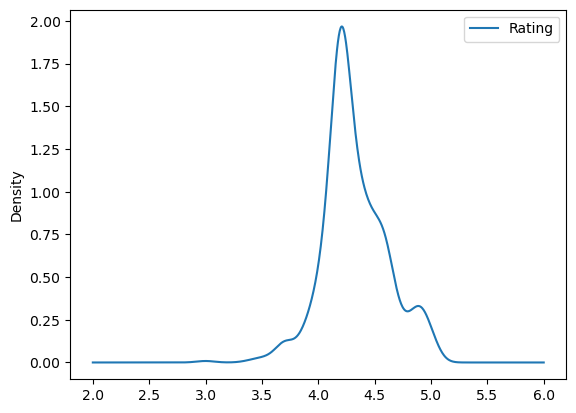

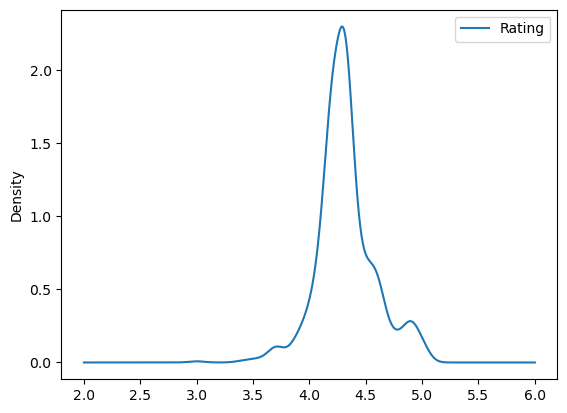

In [41]:
df[['Rating']].plot(kind='kde')
df[['Rating']].fillna(df[['Rating']].mean()).plot(kind='kde')

<AxesSubplot:ylabel='Density'>

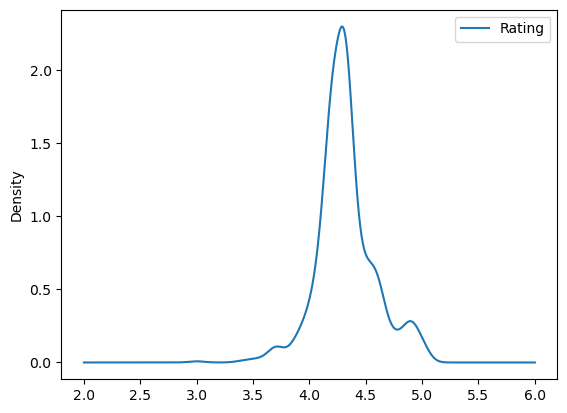

In [42]:
df[['Rating']].fillna(df[['Rating']].mean()).plot(kind='kde')

<AxesSubplot:ylabel='Density'>

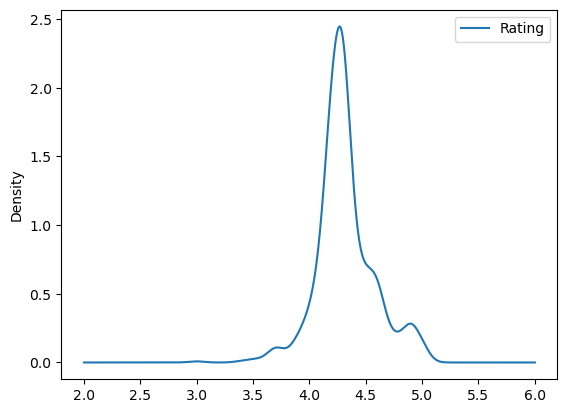

In [43]:
df[['Rating']].fillna(df[['Rating']].median()).plot(kind='kde')

In [44]:
print('median',df[['Rating']].median()[0])
print('mean',df[['Rating']].mean()[0])

median 4.3
mean 4.321170395869185


In [45]:
df[['Rating']] =df[['Rating']].fillna(df[['Rating']].median())

In [52]:
df[['GRAPHCIS']] = df[['GRAPHCIS']].applymap(lambda x: x.partition(' Gr')[0].replace('...','GB').replace('GGB','GB').replace('GB GB','GB'))

In [54]:
def grp(x):
    if x.startswith('AMD') or x.startswith('GB'):
        x = 'N GRAP'
    return x

In [55]:
df[['GRAPHCIS']] = df[['GRAPHCIS']].applymap(grp)

In [56]:
def mb(x):
    if x.split(' ')[1]=='MB':
        y = int(x.split(' ')[0])
        y = str(y/1024)
        x = y+' GB'
    return x

In [57]:
df[['GRAPHCIS']] = df[['GRAPHCIS']].applymap(mb)

In [83]:
df.loc[(df['GRAPHCIS']=='N GRAP') & (df['MRP'] <= 46990), ['GRAPHCIS']]=['0.125 GB']
df.loc[(df['GRAPHCIS']=='N GRAP') & (df['MRP'] > 46990) & (df['MRP'] < 106323), ['GRAPHCIS']]=['2 GB']
df.loc[(df['GRAPHCIS']=='N GRAP') & (df['MRP'] > 106323) & (df['MRP'] < 165656), ['GRAPHCIS']]=['4 GB']
df.loc[(df['GRAPHCIS']=='N GRAP') & (df['MRP'] > 165656) & (df['MRP'] < 224990), ['GRAPHCIS']]=['6 GB']
df.loc[(df['GRAPHCIS']=='N GRAP') & (df['MRP'] > 224990) & (df['MRP'] < 345390), ['GRAPHCIS']]=['8 GB']
df.loc[(df['GRAPHCIS']=='N GRAP') & (df['MRP'] >= 345390) , ['GRAPHCIS']]=['16 GB']

In [85]:
df[['GRAPHCIS']] = df[['GRAPHCIS']].applymap(lambda x: x.split(' ')[0]).applymap(float)

In [95]:
df[['GENERATION']] = df[['GENERATION']].replace('N GENE','11th Gen')

In [99]:
df[['Brand']] = df[['Brand']].applymap(lambda x: x.split(' ')[0])

In [100]:
df

,Rating,MRP,Brand,Processor,RAM,ROM,OPERATING_SYSTEM,GRAPHCIS,BIT,DISPLAY,GENERATION,WARRANTY,ROM_TYPE
0,4.2,36990,Lenovo,Intel Core i3,8,256,Windows 11,0.125,64,35.560,11th Gen,2,SSD
1,4.2,39990,Lenovo,Intel Core i3,8,512,Windows 11,0.125,64,39.624,11th Gen,2,SSD
2,4.3,32990,ASUS,Intel Core i3,8,512,Windows 11,0.125,64,39.624,10th Gen,1,SSD
3,4.4,49990,HP,AMD Ryzen 5 Hexa Core,8,512,Windows 10,4.000,64,39.624,11th Gen,1,SSD
4,4.4,49990,ASUS,Intel Core i5,8,512,Windows 11,4.000,64,39.624,10th Gen,1,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,4.0,23490,ASUS,Intel Celeron Dual Core,4,64,Chrome OS,0.125,64,29.464,11th Gen,1,EMMC Storage
716,4.5,73490,Lenovo,AMD Ryzen 7 Octa Core,8,512,Windows 11,4.000,64,39.624,11th Gen,1,SSD
717,4.3,194990,ASUS,AMD Ryzen 9 Octa Core,16,1024,Windows 11,8.000,64,39.624,11th Gen,1,SSD
718,3.0,125990,ASUS,Intel Core i7,16,512,Windows 11,4.000,64,35.560,12th Gen,1,SSD


In [126]:
df[['GENERATION']] = df[['GENERATION']].applymap(lambda x: x.partition('th')[0].partition('rd')[0].partition('c')[0]).applymap(int)

In [127]:
df

,Brand,Processor,RAM,ROM,OPERATING_SYSTEM,GRAPHCIS,BIT,DISPLAY,GENERATION,WARRANTY,ROM_TYPE,Rating,MRP
0,Lenovo,Intel Core i3,8,256,Windows 11,0.125,64,35.560,11,2,SSD,4.2,36990
1,Lenovo,Intel Core i3,8,512,Windows 11,0.125,64,39.624,11,2,SSD,4.2,39990
2,ASUS,Intel Core i3,8,512,Windows 11,0.125,64,39.624,10,1,SSD,4.3,32990
3,HP,AMD Ryzen 5 Hexa Core,8,512,Windows 10,4.000,64,39.624,11,1,SSD,4.4,49990
4,ASUS,Intel Core i5,8,512,Windows 11,4.000,64,39.624,10,1,SSD,4.4,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,ASUS,Intel Celeron Dual Core,4,64,Chrome OS,0.125,64,29.464,11,1,EMMC Storage,4.0,23490
716,Lenovo,AMD Ryzen 7 Octa Core,8,512,Windows 11,4.000,64,39.624,11,1,SSD,4.5,73490
717,ASUS,AMD Ryzen 9 Octa Core,16,1024,Windows 11,8.000,64,39.624,11,1,SSD,4.3,194990
718,ASUS,Intel Core i7,16,512,Windows 11,4.000,64,35.560,12,1,SSD,3.0,125990


In [109]:
#df= df[list(df.columns[2:])+list(df.columns[:2])]

In [128]:
#df.to_csv('/Volumes/study/filpkart_clean.csv',index=False)

In [2]:
df = pd.read_csv(r'/Volumes/study/filpkart_clean.csv')

In [3]:
df1 = df.copy()

In [4]:
fv = df1.drop(['MRP'],axis=1)
cv = df1[['MRP']]

In [5]:
it = []
ob = []
for i in fv.columns:
    if fv[i].dtype == "object":
        ob.append(i)
    else:
        it.append(i)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,train_size=0.8,random_state=42)

In [8]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [9]:
ohe = OneHotEncoder()
a = ohe.fit_transform(x_train[ob]).toarray()
x_train[ohe.get_feature_names()] = pd.DataFrame(a)

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
x_train = x_train.drop(ob,axis=1)

In [11]:
x_train

,RAM,ROM,GRAPHCIS,BIT,DISPLAY,GENERATION,WARRANTY,Rating,x0_ALIENWARE,x0_APPLE,...,x2_DOS,x2_Mac OS Big Sur,x2_Mac OS Monterey,x2_Windows,x2_Windows 10,x2_Windows 10 Pro,x2_Windows 11,x3_EMMC Storage,x3_HDD,x3_SSD
0,8,512,0.125,64,39.624,11,1,4.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,16,1024,8.000,64,39.624,11,1,4.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,16,1024,4.000,64,40.640,11,1,4.3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,8,1024,4.000,64,39.624,8,1,4.6,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16,1024,6.000,64,39.624,11,1,4.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,8,512,0.125,64,39.624,11,2,4.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
572,16,1024,6.000,64,39.624,11,2,4.2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
573,8,512,0.125,64,39.624,11,2,4.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
574,8,512,4.000,64,40.894,11,1,4.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#std = MinMaxScaler()
#x_train = std.fit_transform(x_train)
#x_test = std.transform(x_test)

In [15]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [16]:
tr = ohe.transform(x_test[ob]).toarray()
x_test[ohe.get_feature_names()] = pd.DataFrame(tr)
x_test = x_test.drop(ob,axis=1)

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
predi = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
mean_absolute_error(y_test,predi)

10524.16743696227

In [20]:
r2_score(y_test,predi)

0.9301748312893429